# Project Description


Detecting Pediatric Acute Lymphoblastic Leukemia using Computer Vision

https://omdena.com/chapter-challenges/detecting-pediatric-acute-lymphoblastic-leukemia-using-computer-vision/

# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install Required Packages

In [2]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 783.5 kB/s eta 0:00:00


# Imports

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
  

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import sklearn.metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

import optuna




# Load Data - Batch 3

In [4]:
!unzip '/content/drive/MyDrive/omdena_liverpool_all/C-NMC_Leukemia/training_test_pickle/batch_3.zip'

Archive:  /content/drive/MyDrive/omdena_liverpool_all/C-NMC_Leukemia/training_test_pickle/batch_3.zip
  inflating: batch_3/test_data.pickle  
  inflating: batch_3/train_data.pickle  


In [5]:
df_train = pd.read_pickle('./batch_3/train_data.pickle')
df_test = pd.read_pickle('./batch_3/test_data.pickle')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11649 entries, 0 to 11648
Columns: 4609 entries, 0 to label
dtypes: float32(4608), int64(1)
memory usage: 204.9 MB


In [7]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,4599,4600,4601,4602,4603,4604,4605,4606,4607,label
0,0.000000,0.0,0.335362,0.191588,0.111455,0.0,0.0,0.000000,0.0,0.233555,...,0.000000,0.000000,0.0,0.000000,0.336870,0.0,0.0,0.280540,0.0,1
1,0.058480,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.835123,0.320351,0.0,0.395172,0.000000,0.0,0.0,0.000000,0.0,0
2,0.282112,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.068944,0.0,0.000000,...,0.715905,0.171945,0.0,0.000000,0.308108,0.0,0.0,0.079297,0.0,0
3,0.387874,0.0,0.000000,0.050626,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.576575,0.180843,0.0,0.027337,0.151989,0.0,0.0,0.175057,0.0,0
4,0.141062,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.851573,0.096842,0.0,0.032068,0.478181,0.0,0.0,0.115065,0.0,1


In [8]:
df_train.shape

(11649, 4609)

In [9]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,4599,4600,4601,4602,4603,4604,4605,4606,4607,label
0,0.000000,0.0,0.000000,0.205597,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.819428,0.000000,0.000000,0.577625,0.190390,0.0,0.0,0.000000,0.0,1
1,0.000000,0.0,0.395822,0.193037,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.687352,0.356907,0.000000,0.076678,0.627020,0.0,0.0,0.625178,0.0,0
2,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.012396,0.0,0.0,...,0.486694,0.231280,0.000000,0.000000,0.247947,0.0,0.0,0.000000,0.0,0
3,0.804970,0.0,0.000000,0.065013,0.0,0.0,0.0,0.069156,0.0,0.0,...,0.682133,0.193544,0.000000,0.000000,0.177270,0.0,0.0,0.482308,0.0,0
4,0.168983,0.0,0.684929,0.458340,0.0,0.0,0.0,0.125606,0.0,0.0,...,0.545165,0.335207,0.013007,0.147285,0.393345,0.0,0.0,0.408651,0.0,1


In [10]:
df_test.shape

(2913, 4609)

# Create X and y Data to Feed ML Models

In [11]:
X_train = np.array(df_train.iloc[:,:-1].copy())
y_train = np.array(df_train['label'].copy())

In [12]:
(X_train.shape, y_train.shape)

((11649, 4608), (11649,))

In [13]:
X_test = np.array(df_test.iloc[:,:-1].copy())
y_test = np.array(df_test['label'].copy())

In [14]:
(X_test.shape, y_test.shape)

((2913, 4608), (2913,))

# Classification - Logistic Regression

In [15]:
clf_lreg = LogisticRegression(max_iter=1000000).fit(X_train, y_train)
y_pred = clf_lreg.predict(X_test)

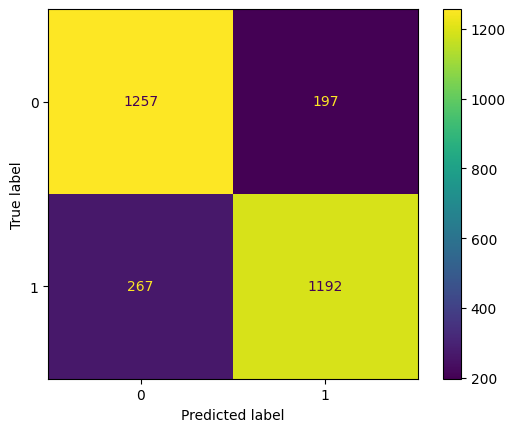

In [16]:
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [17]:
print(classification_report(y_train, clf_lreg.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      5818
           1       0.94      0.89      0.91      5831

    accuracy                           0.92     11649
   macro avg       0.92      0.92      0.92     11649
weighted avg       0.92      0.92      0.92     11649



In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1454
           1       0.86      0.82      0.84      1459

    accuracy                           0.84      2913
   macro avg       0.84      0.84      0.84      2913
weighted avg       0.84      0.84      0.84      2913



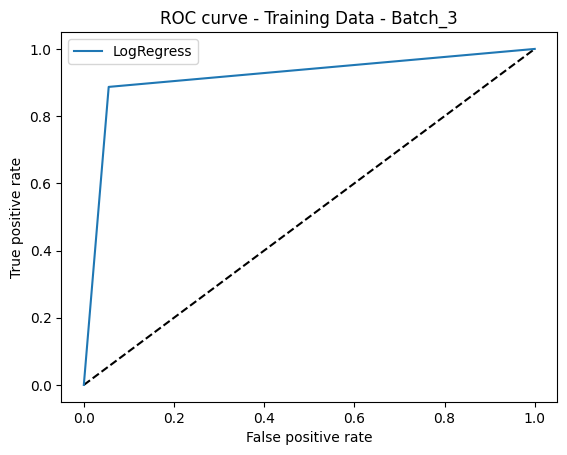

In [19]:
fpr_rf, tpr_rf, _ = roc_curve(y_train, clf_lreg.predict(X_train))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='LogRegress')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Training Data - Batch_3')
plt.legend(loc='best')
plt.show()

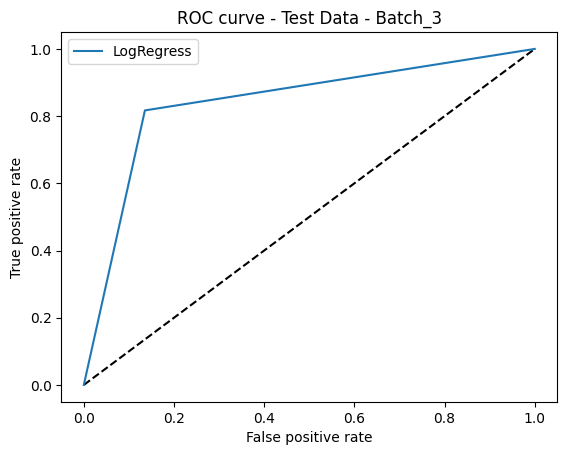

In [20]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, clf_lreg.predict(X_test))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='LogRegress')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Test Data - Batch_3')
plt.legend(loc='best')
plt.show()

# Classification - Random Forest

In [21]:
clf_RF = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [22]:
clf_RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

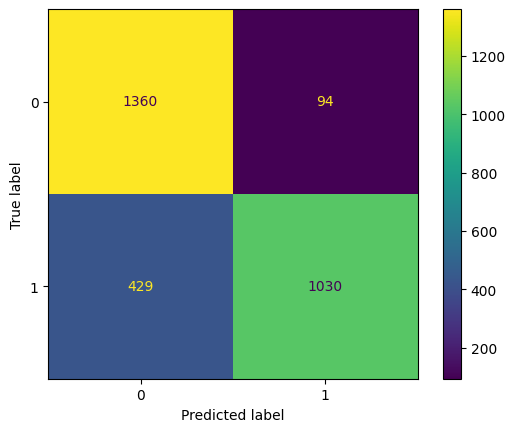

In [23]:
y_pred = clf_RF.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [24]:
print(classification_report(y_train, clf_RF.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5818
           1       1.00      1.00      1.00      5831

    accuracy                           1.00     11649
   macro avg       1.00      1.00      1.00     11649
weighted avg       1.00      1.00      1.00     11649



In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84      1454
           1       0.92      0.71      0.80      1459

    accuracy                           0.82      2913
   macro avg       0.84      0.82      0.82      2913
weighted avg       0.84      0.82      0.82      2913



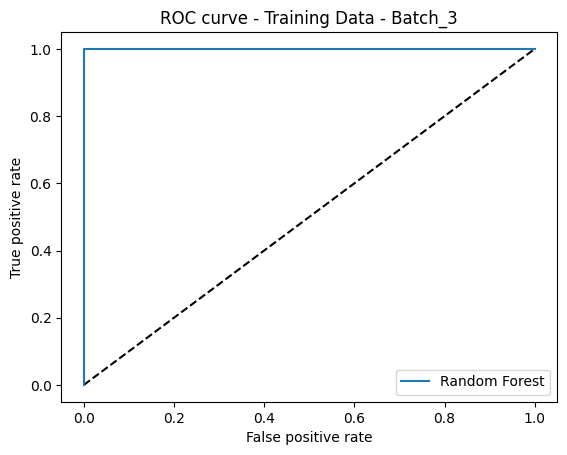

In [26]:
fpr_rf, tpr_rf, _ = roc_curve(y_train, clf_RF.predict(X_train))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Training Data - Batch_3')
plt.legend(loc='best')
plt.show()

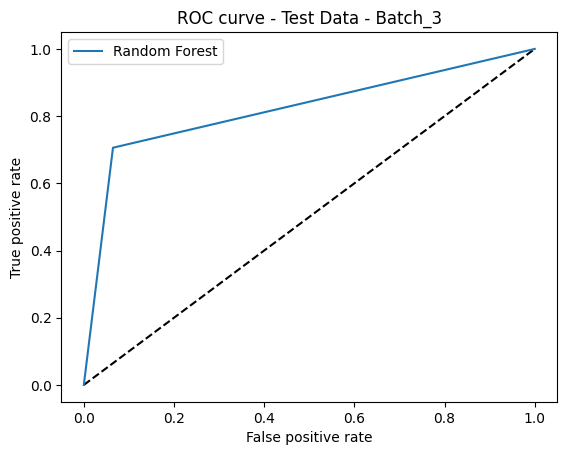

In [27]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, clf_RF.predict(X_test))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Test Data - Batch_3')
plt.legend(loc='best')
plt.show()

# Classification - XGBoost

In [28]:
clf_xgb = XGBClassifier(use_label_encoder=False,eval_metric='logloss',max_depth=50,n_estimators=50,random_state=2023)
clf_xgb.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=50,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=2023, ...)

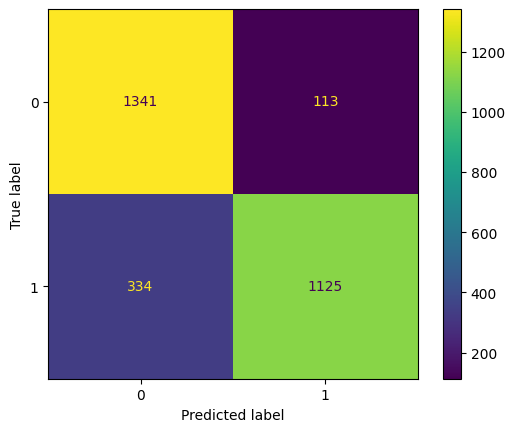

In [29]:
y_pred = clf_xgb.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [30]:
print(classification_report(y_train, clf_xgb.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5818
           1       1.00      1.00      1.00      5831

    accuracy                           1.00     11649
   macro avg       1.00      1.00      1.00     11649
weighted avg       1.00      1.00      1.00     11649



In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1454
           1       0.91      0.77      0.83      1459

    accuracy                           0.85      2913
   macro avg       0.85      0.85      0.85      2913
weighted avg       0.85      0.85      0.85      2913



# Hyperparameter Tuning - Optuna


https://medium.com/optuna/using-optuna-to-optimize-xgboost-hyperparameters-63bfcdfd3407


## Objective Function for Optuna - XGBoost

In [32]:
import xgboost as xgb

In [33]:
def objective(trial):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    param = {
        'n_estimators'      : trial.suggest_int('n_estimators', 50, 500),
        'max_depth'         : trial.suggest_int('max_depth', 50, 500),
        'learning_rate'     : trial.suggest_float('learning_rate', 0.001, 1),
        'verbosity'         : 1,
        'random_state'      : 42,
        'extra_trees'       : True,
        "objective"         : "binary:logistic",
        "eval_metric"       : "auc",
        "booster"           : trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda"            : trial.suggest_float("lambda", 1e-8, 1.0),
        "alpha"             : trial.suggest_float("alpha", 1e-8, 1.0),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0)

    # Add a callback for pruning.
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-auc")
    bst = xgb.train(param, dtrain, evals=[(dtest, "validation")], callbacks=[pruning_callback])
    preds = bst.predict(dtest)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(y_test, pred_labels)
    return accuracy

## Run Optuna

In [34]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=1000)

[I 2023-04-04 23:17:27,545] A new study created in memory with name: no-name-f31a5897-0028-4801-91dd-61434500404a


[23:17:28] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.50000
[1]	validation-auc:0.50000
[2]	validation-auc:0.50000
[3]	validation-auc:0.50000
[4]	validation-auc:0.50000
[5]	validation-auc:0.50000
[6]	validation-auc:0.50000
[7]	validation-auc:0.50000
[8]	validation-auc:0.50000
[9]	validation-auc:0.50000


[I 2023-04-04 23:17:28,892] Trial 0 finished with value: 0.5008582217645039 and parameters: {'n_estimators': 62, 'max_depth': 183, 'learning_rate': 0.3882734212285158, 'booster': 'gblinear', 'lambda': 0.884884093467588, 'alpha': 0.5742455299931608}. Best is trial 0 with value: 0.5008582217645039.


[23:17:29] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84355
[1]	validation-auc:0.85026
[2]	validation-auc:0.86438
[3]	validation-auc:0.87232
[4]	validation-auc:0.87523
[5]	validation-auc:0.88007
[6]	validation-auc:0.88212
[7]	validation-auc:0.88568
[8]	validation-auc:0.88730
[9]	validation-auc:0.88955


[I 2023-04-04 23:17:53,366] Trial 1 finished with value: 0.815653964984552 and parameters: {'n_estimators': 388, 'max_depth': 111, 'learning_rate': 0.7048878299106792, 'booster': 'gbtree', 'lambda': 0.9666634950762094, 'alpha': 0.9887682208259273, 'eta': 0.2327839932995911, 'gamma': 0.08664035739490179, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 0.815653964984552.


[23:17:53] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84422
[1]	validation-auc:0.84422
[2]	validation-auc:0.84422
[3]	validation-auc:0.84968
[4]	validation-auc:0.86211
[5]	validation-auc:0.85782
[6]	validation-auc:0.86491
[7]	validation-auc:0.87349
[8]	validation-auc:0.87606
[9]	validation-auc:0.88121


[I 2023-04-04 23:18:21,996] Trial 2 finished with value: 0.8111912118091315 and parameters: {'n_estimators': 61, 'max_depth': 357, 'learning_rate': 0.6873247260513681, 'booster': 'dart', 'lambda': 0.5441703357076041, 'alpha': 0.9856147568503445, 'eta': 0.7456589875973162, 'gamma': 0.20541402093205385, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.6423286016223755, 'skip_drop': 0.3225832650960824}. Best is trial 1 with value: 0.815653964984552.


[23:18:22] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.50000
[1]	validation-auc:0.50000
[2]	validation-auc:0.50000
[3]	validation-auc:0.50000
[4]	validation-auc:0.50000
[5]	validation-auc:0.50000
[6]	validation-auc:0.50000
[7]	validation-auc:0.50000
[8]	validation-auc:0.50000
[9]	validation-auc:0.50000


[I 2023-04-04 23:18:23,282] Trial 3 finished with value: 0.5008582217645039 and parameters: {'n_estimators': 267, 'max_depth': 215, 'learning_rate': 0.5421208076348305, 'booster': 'gblinear', 'lambda': 0.14264894115710688, 'alpha': 0.8225438921016691}. Best is trial 1 with value: 0.815653964984552.


[23:18:23] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84269
[1]	validation-auc:0.85771
[2]	validation-auc:0.86065
[3]	validation-auc:0.86564
[4]	validation-auc:0.87331
[5]	validation-auc:0.87853
[6]	validation-auc:0.87906
[7]	validation-auc:0.88330
[8]	validation-auc:0.88699
[9]	validation-auc:0.88957


[I 2023-04-04 23:18:52,535] Trial 4 finished with value: 0.8146240988671473 and parameters: {'n_estimators': 350, 'max_depth': 247, 'learning_rate': 0.08787760095460309, 'booster': 'gbtree', 'lambda': 0.4294774208936808, 'alpha': 0.5048039758444138, 'eta': 0.032296264609403214, 'gamma': 0.9590403925608028, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 0.815653964984552.


[23:18:53] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.



[I 2023-04-04 23:18:53,427] Trial 5 pruned. Trial was pruned at iteration 0.


[23:18:53] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84451
[1]	validation-auc:0.84978
[2]	validation-auc:0.86570
[3]	validation-auc:0.87374
[4]	validation-auc:0.88031
[5]	validation-auc:0.88337
[6]	validation-auc:0.88613
[7]	validation-auc:0.88975
[8]	validation-auc:0.89243
[9]	validation-auc:0.89408


[I 2023-04-04 23:19:16,104] Trial 6 finished with value: 0.8146240988671473 and parameters: {'n_estimators': 331, 'max_depth': 414, 'learning_rate': 0.6745859830220506, 'booster': 'gbtree', 'lambda': 0.9154754200515698, 'alpha': 0.9166573905271619, 'eta': 0.3238841029939114, 'gamma': 0.3016053263795148, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 0.815653964984552.


[23:19:16] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.83892


[I 2023-04-04 23:19:20,749] Trial 7 pruned. Trial was pruned at iteration 0.


[23:19:21] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84686
[1]	validation-auc:0.85118
[2]	validation-auc:0.86529
[3]	validation-auc:0.87344
[4]	validation-auc:0.87904
[5]	validation-auc:0.88179
[6]	validation-auc:0.88453
[7]	validation-auc:0.88641
[8]	validation-auc:0.88895
[9]	validation-auc:0.88966


[I 2023-04-04 23:19:41,501] Trial 8 finished with value: 0.8170271198077583 and parameters: {'n_estimators': 89, 'max_depth': 57, 'learning_rate': 0.6582932753933859, 'booster': 'gbtree', 'lambda': 0.36201993204380895, 'alpha': 0.05234570945729345, 'eta': 0.546457146609519, 'gamma': 0.8507610076494372, 'grow_policy': 'lossguide'}. Best is trial 8 with value: 0.8170271198077583.


[23:19:41] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.74405


[I 2023-04-04 23:19:42,405] Trial 9 pruned. Trial was pruned at iteration 0.


[23:19:42] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84431
[1]	validation-auc:0.85390
[2]	validation-auc:0.86731
[3]	validation-auc:0.87505
[4]	validation-auc:0.88003
[5]	validation-auc:0.88393
[6]	validation-auc:0.88659
[7]	validation-auc:0.88831
[8]	validation-auc:0.88925
[9]	validation-auc:0.89015


[I 2023-04-04 23:20:03,012] Trial 10 finished with value: 0.8122210779265362 and parameters: {'n_estimators': 157, 'max_depth': 54, 'learning_rate': 0.9919275886344102, 'booster': 'dart', 'lambda': 0.009351470468608347, 'alpha': 0.22130776582082856, 'eta': 0.6882475681367176, 'gamma': 0.6172650163763697, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.004504798327100268, 'skip_drop': 0.9805222052408453}. Best is trial 8 with value: 0.8170271198077583.


[23:20:03] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84098


[I 2023-04-04 23:20:07,447] Trial 11 pruned. Trial was pruned at iteration 0.


[23:20:07] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 23:20:11,122] Trial 12 pruned. Trial was pruned at iteration 0.


[23:20:11] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.83777


[I 2023-04-04 23:20:15,154] Trial 13 pruned. Trial was pruned at iteration 0.


[23:20:15] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.83918


[I 2023-04-04 23:20:19,854] Trial 14 pruned. Trial was pruned at iteration 0.


[23:20:20] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84438


[I 2023-04-04 23:20:26,214] Trial 15 pruned. Trial was pruned at iteration 1.


[23:20:26] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 23:20:29,926] Trial 16 pruned. Trial was pruned at iteration 0.


[23:20:30] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.83814


[I 2023-04-04 23:20:34,601] Trial 17 pruned. Trial was pruned at iteration 0.


[23:20:35] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.83992


[I 2023-04-04 23:20:38,235] Trial 18 pruned. Trial was pruned at iteration 0.


[23:20:38] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84397
[1]	validation-auc:0.85007
[2]	validation-auc:0.86573
[3]	validation-auc:0.87124
[4]	validation-auc:0.87853
[5]	validation-auc:0.88294
[6]	validation-auc:0.88617
[7]	validation-auc:0.88788
[8]	validation-auc:0.88868
[9]	validation-auc:0.89017


[I 2023-04-04 23:21:02,728] Trial 19 finished with value: 0.8118777892207346 and parameters: {'n_estimators': 498, 'max_depth': 482, 'learning_rate': 0.7168199524553557, 'booster': 'dart', 'lambda': 0.5282746478919788, 'alpha': 0.9965915710037021, 'eta': 0.02375302495038331, 'gamma': 0.23425684005883224, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.006779260933776787, 'skip_drop': 0.8243600282040576}. Best is trial 8 with value: 0.8170271198077583.


[23:21:03] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.83836


[I 2023-04-04 23:21:06,392] Trial 20 pruned. Trial was pruned at iteration 0.


[23:21:06] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 23:21:10,429] Trial 21 pruned. Trial was pruned at iteration 0.


[23:21:10] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.83957


[I 2023-04-04 23:21:15,233] Trial 22 pruned. Trial was pruned at iteration 0.


[23:21:15] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84364


[I 2023-04-04 23:21:19,367] Trial 23 pruned. Trial was pruned at iteration 0.


[23:21:20] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84409
[1]	validation-auc:0.85203
[2]	validation-auc:0.86769
[3]	validation-auc:0.87606
[4]	validation-auc:0.87874
[5]	validation-auc:0.88243
[6]	validation-auc:0.88503
[7]	validation-auc:0.88764
[8]	validation-auc:0.88947
[9]	validation-auc:0.89191


[I 2023-04-04 23:21:41,454] Trial 24 finished with value: 0.815653964984552 and parameters: {'n_estimators': 230, 'max_depth': 69, 'learning_rate': 0.6251996471011559, 'booster': 'gbtree', 'lambda': 0.7920361562936791, 'alpha': 0.7968920413971583, 'eta': 0.3548988705844964, 'gamma': 0.7146924106699147, 'grow_policy': 'lossguide'}. Best is trial 8 with value: 0.8170271198077583.


[23:21:41] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84408
[1]	validation-auc:0.85142
[2]	validation-auc:0.86848
[3]	validation-auc:0.87559
[4]	validation-auc:0.88172
[5]	validation-auc:0.88573
[6]	validation-auc:0.88883
[7]	validation-auc:0.89064
[8]	validation-auc:0.89147
[9]	validation-auc:0.89397


[I 2023-04-04 23:22:05,632] Trial 25 finished with value: 0.8269824922760041 and parameters: {'n_estimators': 223, 'max_depth': 87, 'learning_rate': 0.6104381088378684, 'booster': 'gbtree', 'lambda': 0.7688001585579272, 'alpha': 0.8090661738885058, 'eta': 0.35394372678523967, 'gamma': 0.6799123332864336, 'grow_policy': 'lossguide'}. Best is trial 25 with value: 0.8269824922760041.


[23:22:06] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84445
[1]	validation-auc:0.85936
[2]	validation-auc:0.86977
[3]	validation-auc:0.87673
[4]	validation-auc:0.88102
[5]	validation-auc:0.88555
[6]	validation-auc:0.89012
[7]	validation-auc:0.89324
[8]	validation-auc:0.89523
[9]	validation-auc:0.89678


[I 2023-04-04 23:22:31,418] Trial 26 finished with value: 0.8249227600411947 and parameters: {'n_estimators': 108, 'max_depth': 99, 'learning_rate': 0.4913759446152004, 'booster': 'gbtree', 'lambda': 0.9217013250830643, 'alpha': 0.8988110826283602, 'eta': 0.4541482009492239, 'gamma': 0.696943773069668, 'grow_policy': 'lossguide'}. Best is trial 25 with value: 0.8269824922760041.


[23:22:31] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84630
[1]	validation-auc:0.85823
[2]	validation-auc:0.87129
[3]	validation-auc:0.87839
[4]	validation-auc:0.88403
[5]	validation-auc:0.88749
[6]	validation-auc:0.89137
[7]	validation-auc:0.89407
[8]	validation-auc:0.89534
[9]	validation-auc:0.89684


[I 2023-04-04 23:22:54,445] Trial 27 finished with value: 0.8232063165121868 and parameters: {'n_estimators': 99, 'max_depth': 96, 'learning_rate': 0.4999385590248031, 'booster': 'gbtree', 'lambda': 0.7714693944166727, 'alpha': 0.8716515453191874, 'eta': 0.48804834912513545, 'gamma': 0.6928623063693852, 'grow_policy': 'depthwise'}. Best is trial 25 with value: 0.8269824922760041.


[23:22:54] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.50000


[I 2023-04-04 23:22:55,365] Trial 28 pruned. Trial was pruned at iteration 0.


[23:22:55] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84662
[1]	validation-auc:0.85582
[2]	validation-auc:0.86954
[3]	validation-auc:0.87800
[4]	validation-auc:0.88539
[5]	validation-auc:0.88723
[6]	validation-auc:0.88868
[7]	validation-auc:0.89104
[8]	validation-auc:0.89359
[9]	validation-auc:0.89610


[I 2023-04-04 23:23:24,037] Trial 29 finished with value: 0.8211465842773773 and parameters: {'n_estimators': 101, 'max_depth': 182, 'learning_rate': 0.4732753981390779, 'booster': 'dart', 'lambda': 0.8965872992344032, 'alpha': 0.8366048348145229, 'eta': 0.43898148155686906, 'gamma': 0.592646528040329, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.4057121814364135, 'skip_drop': 0.5931750261755109}. Best is trial 25 with value: 0.8269824922760041.


[23:23:24] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.



[I 2023-04-04 23:23:24,951] Trial 30 pruned. Trial was pruned at iteration 0.


[23:23:25] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84657
[1]	validation-auc:0.85592
[2]	validation-auc:0.86590
[3]	validation-auc:0.87373
[4]	validation-auc:0.87923


[I 2023-04-04 23:23:42,175] Trial 31 pruned. Trial was pruned at iteration 5.


[23:23:42] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84538
[1]	validation-auc:0.86042
[2]	validation-auc:0.87184
[3]	validation-auc:0.87909
[4]	validation-auc:0.88464
[5]	validation-auc:0.88615
[6]	validation-auc:0.88695
[7]	validation-auc:0.88917
[8]	validation-auc:0.89255
[9]	validation-auc:0.89499


[I 2023-04-04 23:24:09,478] Trial 32 finished with value: 0.815653964984552 and parameters: {'n_estimators': 184, 'max_depth': 105, 'learning_rate': 0.38260897122133, 'booster': 'dart', 'lambda': 0.9143009979304251, 'alpha': 0.9125500266011839, 'eta': 0.3692626815875075, 'gamma': 0.6198868251475531, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.36218716877919277, 'skip_drop': 0.5551120940024995}. Best is trial 25 with value: 0.8269824922760041.


[23:24:10] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84357


[I 2023-04-04 23:24:14,191] Trial 33 pruned. Trial was pruned at iteration 0.


[23:24:14] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84339


[I 2023-04-04 23:24:18,251] Trial 34 pruned. Trial was pruned at iteration 0.


[23:24:18] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84681
[1]	validation-auc:0.85939
[2]	validation-auc:0.86893


[I 2023-04-04 23:24:31,044] Trial 35 pruned. Trial was pruned at iteration 3.


[23:24:31] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84548
[1]	validation-auc:0.85844
[2]	validation-auc:0.86688
[3]	validation-auc:0.87610
[4]	validation-auc:0.88272
[5]	validation-auc:0.88369


[I 2023-04-04 23:24:49,007] Trial 36 pruned. Trial was pruned at iteration 6.


[23:24:49] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.50000


[I 2023-04-04 23:24:49,925] Trial 37 pruned. Trial was pruned at iteration 0.


[23:24:50] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 23:24:53,605] Trial 38 pruned. Trial was pruned at iteration 0.


[23:24:54] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84548
[1]	validation-auc:0.85601
[2]	validation-auc:0.86680
[3]	validation-auc:0.87823
[4]	validation-auc:0.88499
[5]	validation-auc:0.88872
[6]	validation-auc:0.89182
[7]	validation-auc:0.89512
[8]	validation-auc:0.89564
[9]	validation-auc:0.89649


[I 2023-04-04 23:25:22,068] Trial 39 finished with value: 0.8180569859251631 and parameters: {'n_estimators': 104, 'max_depth': 165, 'learning_rate': 0.4037132662985745, 'booster': 'dart', 'lambda': 0.8097021141541735, 'alpha': 0.941985168108959, 'eta': 0.6009248462413541, 'gamma': 0.6717791631462423, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.570724949604793, 'skip_drop': 0.6837635721182629}. Best is trial 25 with value: 0.8269824922760041.


[23:25:22] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84494
[1]	validation-auc:0.85218
[2]	validation-auc:0.86347


[I 2023-04-04 23:25:32,474] Trial 40 pruned. Trial was pruned at iteration 2.


[23:25:33] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84695
[1]	validation-auc:0.85843
[2]	validation-auc:0.86754
[3]	validation-auc:0.87621
[4]	validation-auc:0.88434
[5]	validation-auc:0.88680
[6]	validation-auc:0.89024
[7]	validation-auc:0.89208
[8]	validation-auc:0.89345
[9]	validation-auc:0.89687


[I 2023-04-04 23:26:00,144] Trial 41 finished with value: 0.826295914864401 and parameters: {'n_estimators': 98, 'max_depth': 174, 'learning_rate': 0.41081329644974574, 'booster': 'dart', 'lambda': 0.813994456607436, 'alpha': 0.9027511746936813, 'eta': 0.5983750079637848, 'gamma': 0.6622794540532995, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.5806749027066623, 'skip_drop': 0.6813985218744362}. Best is trial 25 with value: 0.8269824922760041.


[23:26:00] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84512


[I 2023-04-04 23:26:06,788] Trial 42 pruned. Trial was pruned at iteration 1.


[23:26:07] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84615
[1]	validation-auc:0.85932
[2]	validation-auc:0.87318
[3]	validation-auc:0.88163
[4]	validation-auc:0.88626
[5]	validation-auc:0.88891
[6]	validation-auc:0.89073
[7]	validation-auc:0.88623
[8]	validation-auc:0.89148
[9]	validation-auc:0.89462


[I 2023-04-04 23:26:33,933] Trial 43 finished with value: 0.8177136972193615 and parameters: {'n_estimators': 163, 'max_depth': 314, 'learning_rate': 0.4930521068125226, 'booster': 'dart', 'lambda': 0.823505886376028, 'alpha': 0.8110157323775011, 'eta': 0.4924164424781561, 'gamma': 0.5806324717052627, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.808113710368615, 'skip_drop': 0.8248700484762428}. Best is trial 25 with value: 0.8269824922760041.


[23:26:34] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84404


[I 2023-04-04 23:26:37,872] Trial 44 pruned. Trial was pruned at iteration 0.


[23:26:38] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84654
[1]	validation-auc:0.85615
[2]	validation-auc:0.85517


[I 2023-04-04 23:26:47,925] Trial 45 pruned. Trial was pruned at iteration 2.


[23:26:48] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84695
[1]	validation-auc:0.85661
[2]	validation-auc:0.86933
[3]	validation-auc:0.87869
[4]	validation-auc:0.88358
[5]	validation-auc:0.88742
[6]	validation-auc:0.89055
[7]	validation-auc:0.89236
[8]	validation-auc:0.89390
[9]	validation-auc:0.89461


[I 2023-04-04 23:27:11,716] Trial 46 finished with value: 0.8256093374527979 and parameters: {'n_estimators': 134, 'max_depth': 371, 'learning_rate': 0.4641863831702663, 'booster': 'gbtree', 'lambda': 0.7564361817815944, 'alpha': 0.9445401286555524, 'eta': 0.6517311085483285, 'gamma': 0.8104502175987862, 'grow_policy': 'depthwise'}. Best is trial 25 with value: 0.8269824922760041.


[23:27:12] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84406


[I 2023-04-04 23:27:15,806] Trial 47 pruned. Trial was pruned at iteration 0.


[23:27:16] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 23:27:19,405] Trial 48 pruned. Trial was pruned at iteration 0.


[23:27:19] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84494
[1]	validation-auc:0.86216
[2]	validation-auc:0.87205
[3]	validation-auc:0.87750
[4]	validation-auc:0.88338
[5]	validation-auc:0.88658
[6]	validation-auc:0.88720
[7]	validation-auc:0.89029
[8]	validation-auc:0.89330
[9]	validation-auc:0.89406


[I 2023-04-04 23:27:43,069] Trial 49 finished with value: 0.8201167181599726 and parameters: {'n_estimators': 81, 'max_depth': 354, 'learning_rate': 0.5935265331177122, 'booster': 'gbtree', 'lambda': 0.7510984076251656, 'alpha': 0.9660783539193984, 'eta': 0.5540322869740465, 'gamma': 0.7446369336832476, 'grow_policy': 'lossguide'}. Best is trial 25 with value: 0.8269824922760041.


[23:27:43] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 23:27:46,764] Trial 50 pruned. Trial was pruned at iteration 0.


[23:27:47] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84700
[1]	validation-auc:0.85729


[I 2023-04-04 23:27:57,464] Trial 51 pruned. Trial was pruned at iteration 2.


[23:27:57] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.50000


[I 2023-04-04 23:27:58,405] Trial 52 pruned. Trial was pruned at iteration 0.


[23:27:58] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 23:28:02,032] Trial 53 pruned. Trial was pruned at iteration 0.


[23:28:02] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 23:28:05,943] Trial 54 pruned. Trial was pruned at iteration 0.


[23:28:06] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84454


[I 2023-04-04 23:28:14,082] Trial 55 pruned. Trial was pruned at iteration 1.


[23:28:14] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 23:28:17,701] Trial 56 pruned. Trial was pruned at iteration 0.


[23:28:18] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84658
[1]	validation-auc:0.85531


[I 2023-04-04 23:28:28,213] Trial 57 pruned. Trial was pruned at iteration 2.


[23:28:28] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.83806


[I 2023-04-04 23:28:31,877] Trial 58 pruned. Trial was pruned at iteration 0.


[23:28:32] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84537
[1]	validation-auc:0.85447


[I 2023-04-04 23:28:38,189] Trial 59 pruned. Trial was pruned at iteration 1.


[23:28:38] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.50000


[I 2023-04-04 23:28:39,317] Trial 60 pruned. Trial was pruned at iteration 0.


[23:28:39] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84497
[1]	validation-auc:0.86093
[2]	validation-auc:0.87276
[3]	validation-auc:0.88149
[4]	validation-auc:0.88590
[5]	validation-auc:0.88990
[6]	validation-auc:0.89245
[7]	validation-auc:0.89488
[8]	validation-auc:0.89777
[9]	validation-auc:0.89913


[I 2023-04-04 23:29:02,157] Trial 61 finished with value: 0.8269824922760041 and parameters: {'n_estimators': 82, 'max_depth': 385, 'learning_rate': 0.59545563641948, 'booster': 'gbtree', 'lambda': 0.7737927004948816, 'alpha': 0.9479624168336135, 'eta': 0.5475699091340186, 'gamma': 0.761027365609694, 'grow_policy': 'lossguide'}. Best is trial 25 with value: 0.8269824922760041.


[23:29:02] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 23:29:06,051] Trial 62 pruned. Trial was pruned at iteration 0.


[23:29:06] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84732
[1]	validation-auc:0.85927
[2]	validation-auc:0.87054
[3]	validation-auc:0.87575


[I 2023-04-04 23:29:17,837] Trial 63 pruned. Trial was pruned at iteration 3.


[23:29:18] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84531


[I 2023-04-04 23:29:25,555] Trial 64 pruned. Trial was pruned at iteration 1.


[23:29:26] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 23:29:29,598] Trial 65 pruned. Trial was pruned at iteration 0.


[23:29:30] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 23:29:33,243] Trial 66 pruned. Trial was pruned at iteration 0.


[23:29:33] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84537
[1]	validation-auc:0.85600
[2]	validation-auc:0.86976
[3]	validation-auc:0.87800
[4]	validation-auc:0.88406
[5]	validation-auc:0.88867
[6]	validation-auc:0.89392
[7]	validation-auc:0.89586
[8]	validation-auc:0.89743
[9]	validation-auc:0.90038


[I 2023-04-04 23:29:59,014] Trial 67 finished with value: 0.8256093374527979 and parameters: {'n_estimators': 119, 'max_depth': 331, 'learning_rate': 0.41847780433129794, 'booster': 'gbtree', 'lambda': 0.9133446998719718, 'alpha': 0.8511491338396998, 'eta': 0.4832390536031536, 'gamma': 0.6152332350341423, 'grow_policy': 'depthwise'}. Best is trial 25 with value: 0.8269824922760041.


[23:29:59] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84663
[1]	validation-auc:0.85864
[2]	validation-auc:0.87080
[3]	validation-auc:0.88239
[4]	validation-auc:0.88524
[5]	validation-auc:0.88993
[6]	validation-auc:0.89373
[7]	validation-auc:0.89584
[8]	validation-auc:0.89822
[9]	validation-auc:0.90027


[I 2023-04-04 23:30:24,923] Trial 68 finished with value: 0.8214898729831789 and parameters: {'n_estimators': 112, 'max_depth': 339, 'learning_rate': 0.41802883983966554, 'booster': 'gbtree', 'lambda': 0.8597862489703458, 'alpha': 0.8541753917625214, 'eta': 0.581114211226567, 'gamma': 0.63832605406558, 'grow_policy': 'lossguide'}. Best is trial 25 with value: 0.8269824922760041.


[23:30:25] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 23:30:28,889] Trial 69 pruned. Trial was pruned at iteration 0.


[23:30:29] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84516
[1]	validation-auc:0.85028


[I 2023-04-04 23:30:35,399] Trial 70 pruned. Trial was pruned at iteration 1.


[23:30:36] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84689
[1]	validation-auc:0.85833


[I 2023-04-04 23:30:45,195] Trial 71 pruned. Trial was pruned at iteration 2.


[23:30:45] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84544


[I 2023-04-04 23:30:53,528] Trial 72 pruned. Trial was pruned at iteration 1.


[23:30:54] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84487


[I 2023-04-04 23:30:57,194] Trial 73 pruned. Trial was pruned at iteration 0.


[23:30:57] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 23:31:01,096] Trial 74 pruned. Trial was pruned at iteration 0.


[23:31:01] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84680
[1]	validation-auc:0.85739
[2]	validation-auc:0.86796


[I 2023-04-04 23:31:13,089] Trial 75 pruned. Trial was pruned at iteration 3.


[23:31:13] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84499


[I 2023-04-04 23:31:19,007] Trial 76 pruned. Trial was pruned at iteration 1.


[23:31:19] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 23:31:23,779] Trial 77 pruned. Trial was pruned at iteration 0.


[23:31:24] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84422


[I 2023-04-04 23:31:27,659] Trial 78 pruned. Trial was pruned at iteration 0.


[23:31:28] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.



[I 2023-04-04 23:31:28,701] Trial 79 pruned. Trial was pruned at iteration 0.


[23:31:29] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84548
[1]	validation-auc:0.86127
[2]	validation-auc:0.86953
[3]	validation-auc:0.87622
[4]	validation-auc:0.88327
[5]	validation-auc:0.88643
[6]	validation-auc:0.88947
[7]	validation-auc:0.89050
[8]	validation-auc:0.89297
[9]	validation-auc:0.89513


[I 2023-04-04 23:31:53,246] Trial 80 finished with value: 0.8304153793340199 and parameters: {'n_estimators': 94, 'max_depth': 92, 'learning_rate': 0.5773321859708764, 'booster': 'gbtree', 'lambda': 0.8349986520787811, 'alpha': 0.9257591910538262, 'eta': 0.5058678351524748, 'gamma': 0.6813602327866444, 'grow_policy': 'depthwise'}. Best is trial 80 with value: 0.8304153793340199.


[23:31:53] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84548
[1]	validation-auc:0.86087
[2]	validation-auc:0.86732


[I 2023-04-04 23:32:01,571] Trial 81 pruned. Trial was pruned at iteration 2.


[23:32:02] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84405


[I 2023-04-04 23:32:06,963] Trial 82 pruned. Trial was pruned at iteration 0.


[23:32:07] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84517
[1]	validation-auc:0.85674


[I 2023-04-04 23:32:15,861] Trial 83 pruned. Trial was pruned at iteration 2.


[23:32:16] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84699
[1]	validation-auc:0.86234
[2]	validation-auc:0.87366
[3]	validation-auc:0.88008
[4]	validation-auc:0.88287
[5]	validation-auc:0.88676
[6]	validation-auc:0.88963
[7]	validation-auc:0.89273
[8]	validation-auc:0.89537
[9]	validation-auc:0.89783


[I 2023-04-04 23:32:40,738] Trial 84 finished with value: 0.8235496052179884 and parameters: {'n_estimators': 139, 'max_depth': 366, 'learning_rate': 0.591525174824762, 'booster': 'gbtree', 'lambda': 0.8710146042918463, 'alpha': 0.8605086341877728, 'eta': 0.5111938345796592, 'gamma': 0.6485061022036921, 'grow_policy': 'depthwise'}. Best is trial 80 with value: 0.8304153793340199.


[23:32:41] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84622
[1]	validation-auc:0.85911


[I 2023-04-04 23:32:50,004] Trial 85 pruned. Trial was pruned at iteration 2.


[23:32:50] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84634


[I 2023-04-04 23:32:56,699] Trial 86 pruned. Trial was pruned at iteration 1.


[23:32:57] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84608
[1]	validation-auc:0.85631


[I 2023-04-04 23:33:06,628] Trial 87 pruned. Trial was pruned at iteration 2.


[23:33:07] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84530
[1]	validation-auc:0.85969


[I 2023-04-04 23:33:15,293] Trial 88 pruned. Trial was pruned at iteration 2.


[23:33:15] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84703
[1]	validation-auc:0.85820
[2]	validation-auc:0.86939
[3]	validation-auc:0.87826
[4]	validation-auc:0.88398
[5]	validation-auc:0.88810
[6]	validation-auc:0.88921
[7]	validation-auc:0.89138
[8]	validation-auc:0.89352
[9]	validation-auc:0.89526


[I 2023-04-04 23:33:40,609] Trial 89 finished with value: 0.8208032955715757 and parameters: {'n_estimators': 216, 'max_depth': 113, 'learning_rate': 0.4988592160909442, 'booster': 'gbtree', 'lambda': 0.8005687640109967, 'alpha': 0.9009047732885875, 'eta': 0.5474707640368147, 'gamma': 0.5707516815575686, 'grow_policy': 'depthwise'}. Best is trial 80 with value: 0.8304153793340199.


[23:33:41] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 23:33:44,514] Trial 90 pruned. Trial was pruned at iteration 0.


[23:33:45] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84663


[I 2023-04-04 23:33:52,326] Trial 91 pruned. Trial was pruned at iteration 1.


[23:33:52] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.84700
[1]	validation-auc:0.86038
[2]	validation-auc:0.87078
[3]	validation-auc:0.88000
[4]	validation-auc:0.88583
[5]	validation-auc:0.88850
[6]	validation-auc:0.88946
[7]	validation-auc:0.89210
[8]	validation-auc:0.89448
[9]	validation-auc:0.89595


[I 2023-04-04 23:34:15,071] Trial 92 finished with value: 0.8184002746309647 and parameters: {'n_estimators': 101, 'max_depth': 343, 'learning_rate': 0.6052252261044521, 'booster': 'gbtree', 'lambda': 0.8345009066220537, 'alpha': 0.8746565109630348, 'eta': 0.570035116758813, 'gamma': 0.6491766016998787, 'grow_policy': 'depthwise'}. Best is trial 80 with value: 0.8304153793340199.


## Best XGBoster Model from Optuna

In [35]:
study.best_params

{'n_estimators': 94,
 'max_depth': 92,
 'learning_rate': 0.5773321859708764,
 'booster': 'gbtree',
 'lambda': 0.8349986520787811,
 'alpha': 0.9257591910538262,
 'eta': 0.5058678351524748,
 'gamma': 0.6813602327866444,
 'grow_policy': 'depthwise'}

In [36]:
clf_xgb_opt= XGBClassifier(**study.best_params)

In [37]:
clf_xgb_opt.fit(X_train, y_train)

XGBClassifier(alpha=0.9257591910538262, base_score=None, booster='gbtree',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.5058678351524748,
              eval_metric=None, feature_types=None, gamma=0.6813602327866444,
              gpu_id=None, grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, lambda=0.8349986520787811,
              learning_rate=0.5773321859708764, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=92, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=94, n_jobs=None, ...)

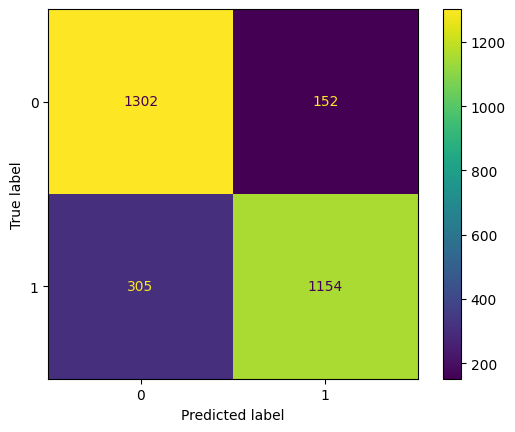

In [38]:
y_pred = clf_xgb_opt.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [39]:
print(classification_report(y_train, clf_xgb.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5818
           1       1.00      1.00      1.00      5831

    accuracy                           1.00     11649
   macro avg       1.00      1.00      1.00     11649
weighted avg       1.00      1.00      1.00     11649



In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1454
           1       0.88      0.79      0.83      1459

    accuracy                           0.84      2913
   macro avg       0.85      0.84      0.84      2913
weighted avg       0.85      0.84      0.84      2913



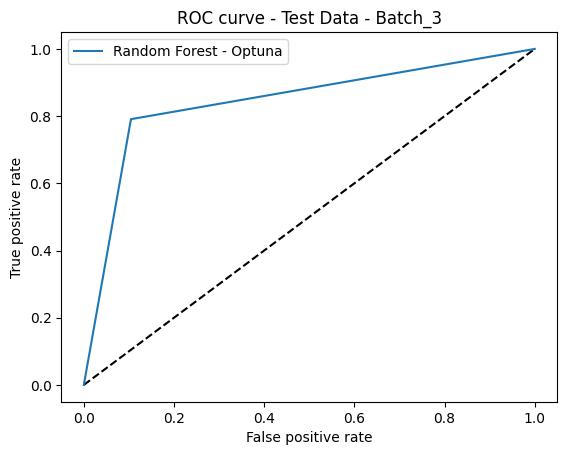

In [41]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, clf_xgb_opt.predict(X_test))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest - Optuna')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Test Data - Batch_3')
plt.legend(loc='best')
plt.show()